In [264]:
import numpy as np

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

import pandas as pd

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

In [265]:
ar_dados=pd.DataFrame.to_numpy(pd.read_excel('ar-w.xlsx').T)
agua_dados=pd.DataFrame.to_numpy(pd.read_excel('agua-w.xlsx').T)

ar_omega_dados= pd.DataFrame.to_numpy(pd.read_excel('ar-T-w.xlsx').T)
agua_omega_dados= pd.DataFrame.to_numpy(pd.read_excel('agua-T-w.xlsx').T)

In [276]:
#omegas de forçamento

omegas_ar = 2*np.pi/np.array([np.mean(i) for i in ar_omega_dados])
omegas_agua = 2*np.pi/np.array([np.mean(i) for i in agua_omega_dados])

omegas_ar_err = np.array([np.std(2*np.pi/i) for i in ar_omega_dados])
omegas_agua_err = np.array([np.std(2*np.pi/i) for i in agua_omega_dados])


0.0186126967468343

In [267]:
def amplitude(y_data):
    y_max = max(y_data)
    y_min = min(y_data)

    A = (y_max - y_min)/2

    return A

In [268]:
amplitudes_ar = []
amplitudes_agua = []

for i in  range(len(ar_dados)):
    amplitudes_ar.append(amplitude(ar_dados[i]/1e6))
for i in  range(len(agua_dados)):
    amplitudes_agua.append(amplitude(agua_dados[i]/1e6))

In [269]:
def func(omega, omega_0, gamma, k):
    return k/np.sqrt((omega_0**2 - omega**2)**2 +  4*gamma**2 *omega**2)

4.561740123804731

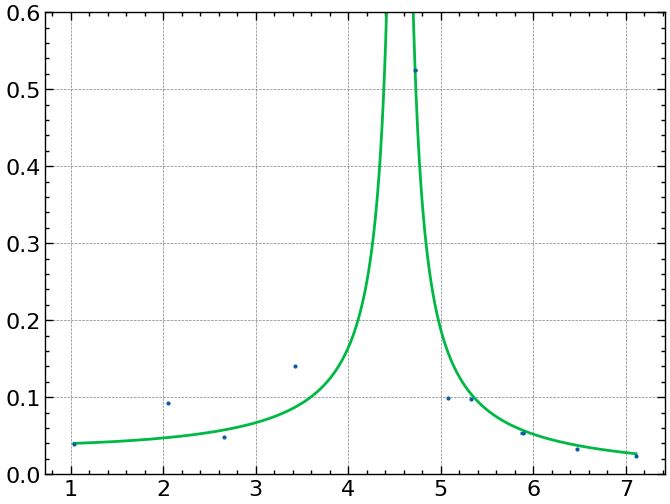

In [270]:
plt.errorbar(omegas_ar,amplitudes_ar, marker = 'o',ls='', ms = 2, xerr=omegas_ar_err)

popt, pcov = curve_fit(func, omegas_ar, amplitudes_ar, p0=[4, 4, 0], bounds=((0, 0, 0), (10, 10, 10)))

xdata = np.linspace(min(omegas_ar), max(omegas_ar) ,1000)
plt.plot(xdata, func(xdata, *popt))
plt.ylim(0,0.6)
popt

np.sqrt(popt[0]**2 -2*popt[1]**2)

4.0826333160630845

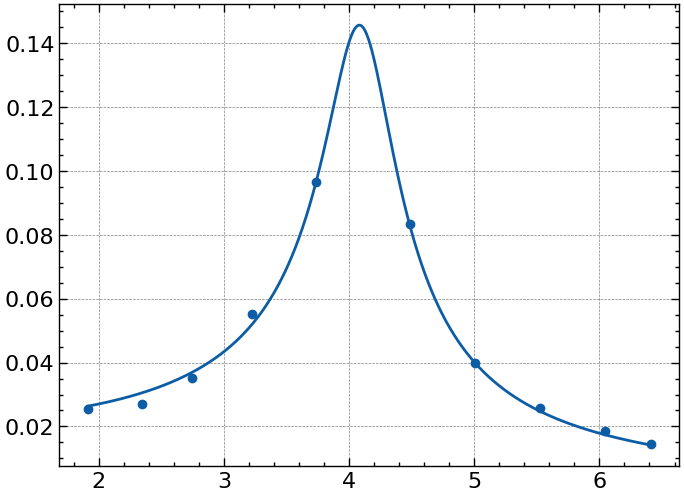

In [271]:
plt.scatter(omegas_agua,amplitudes_agua)

popt, pcov = curve_fit(func, omegas_agua, amplitudes_agua, p0=[4, 0.2, 0.1])

xdata = np.linspace(min(omegas_agua), max(omegas_agua) ,1000)
plt.plot(xdata, func(xdata, *popt))
popt

np.sqrt(popt[0]**2 -2*popt[1]**2)

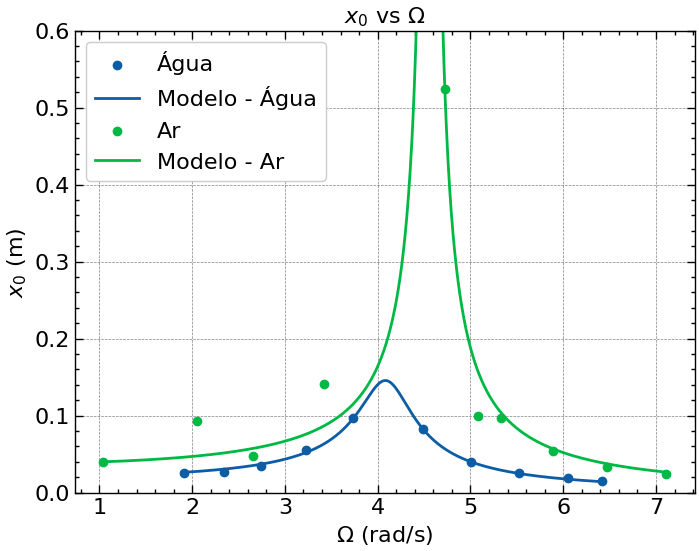

In [272]:
plt.scatter(omegas_agua,amplitudes_agua, label = "Água")

popt, pcov = curve_fit(func, omegas_agua, amplitudes_agua, p0=[4, 0.2, 0.1])

xdata = np.linspace(min(omegas_agua), max(omegas_agua) ,1000)
plt.plot(xdata, func(xdata, *popt), label = 'Modelo - Água')



plt.scatter(omegas_ar,amplitudes_ar, label = "Ar")

popt, pcov = curve_fit(func, omegas_ar, amplitudes_ar, p0=[4, 4, 0], bounds=((0, 0, 0), (10, 10, 10)))

xdata = np.linspace(min(omegas_ar), max(omegas_ar) ,1000)
plt.plot(xdata, func(xdata, *popt), label = 'Modelo - Ar')

plt.title("$x_0$ vs $\Omega$")
plt.ylabel("$x_0$ (m)")
plt.xlabel("$\Omega$ (rad/s)")
plt.ylim(0,0.6)
plt.legend()
